# Constrained optimization : convex methods and other approaches

## Resources

Machine learning and optimization:
https://towardsdatascience.com/a-quick-overview-of-optimization-models-for-machine-learning-and-statistics-38e3a7d13138

Convex functions : https://www.youtube.com/watch?v=7QmGj1_i3MU

*Hands on Machine Learning ...*, Chapter 4 : Gradient Descent : https://drive.google.com/file/d/1t0rc3x5YQBgLXVLET6BzR4jn5vzMI_m0/view?usp=sharing

CVXPY documentation:
https://www.cvxpy.org/

The knapsack problem : 
https://en.wikipedia.org/wiki/Knapsack_problem

NP-Hardness :
https://en.wikipedia.org/wiki/NP-hardness

CVXPY advanced functionalities for integer problems :
https://www.cvxpy.org/tutorial/advanced/index.html


Penalty method : https://en.wikipedia.org/wiki/Penalty_method

Keras regularizers documentation:
https://keras.io/api/layers/regularizers/

Keras constraints documentation:
https://keras.io/api/layers/constraints/


------------------------------------------------
------------------------------------------------

**More about Convex Optimization:**

Stephen Boyd's MOOC:
https://www.edx.org/course/convex-optimization

Stephen Boyd's book:
https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf




In [1]:
import numpy as np
import pandas as pd
import cvxpy as cp

# Part 1 : Convex constrained optimization

Sometimes when adressing a practical data science problem, you might be asked to produce a model that respect some constraints. For example produce a linear regression, but only with positive coefficients because it doesn't make sense to have negative coefficients for the problem you are adressing. 

As you know by now, most of machine learning consists in minimizing an error function. Minimizing a function is the definition of an applied mathematics field : *optimization*. Thus most of machine learning actually is optimization, you can read more about this here:

https://towardsdatascience.com/a-quick-overview-of-optimization-models-for-machine-learning-and-statistics-38e3a7d13138


The general form of an optimization problem (or program) also allows to impose constraints on the function parameters. It writes:

<div style="font-size: 150%;" align= "center"> 
\begin{eqnarray*}
    \mathrm{minimize} &\;\;&f_0(x)&\;&\\
    \mathrm{subject\ to}&\;\;&f_i(x) \leq 0 &\;& i = 1, \ldots, m\\
    &&h_j(x) = 0 &\;& j = 1, \ldots, p
\end{eqnarray*}
</div>

- $x \in \mathbb{R}^n$ is the optimization variable, or the parameters
- $f_0 : \mathbb{R}^n \to \mathbb{R}$ is the objective or error function
- $f_i : \mathbb{R}^n \to \mathbb{R}$ are the inequality constraint functions
- $h_i : \mathbb{R}^n \to \mathbb{R}$ are the equality constraint functions

The optimal value $p^\star$ of $f_0$ is reached for the parameters $x$ that satisfies all the constraints and minimize $f_0$ : $p^\star = \mathrm{inf}\{ f_0(x) | f_i(x) \leq 0, i = 1, \ldots, m, h_j(x) = 0, j = 1, \ldots, p$ \}. Such optimal value of the parameters $x$ is written $x^\star$.

Sometimes when the constraints are incompatible, there are no solutions and the problem is *infeasible*. Conversely sometimes $p^\star = - \infty $ and the problem is called *unbounded below*.

Not all optimization problems are easy to solve, but a subset of them, called *convex optimization problems*, are. A convex optimization problem follows this form :

<div style="font-size: 150%;" align= "center"> 
\begin{eqnarray*}
    \mathrm{minimize} &\;\;&f_0(x)&\;&\\
    \mathrm{subject\ to}&\;\;&f_i(x) \leq 0 &\;& i = 1, \ldots, m\\
    &&a_j^T x = b_j &\;& j = 1, \ldots, p
\end{eqnarray*}
</div>

where $f_0, \cdots, f_m$ are convex functions, and equality constraints are affine.

A function is *convex* if the line segment between any two points on the graph of the function lies above the graph between the two points. Seeing it drawn makes it much clearer : https://www.youtube.com/watch?v=7QmGj1_i3MU

Convex optimization problems have the nice property that any locally optimal point is also a globally optimal point $x^\star$, which makes them relatively easy to solve and guarantees that the solution $x^\star$ is among the best ones.

If you don't remember what are local and global optima, re-read the *Gradient descent* part in chapter 4 of *Hands on Machine Learning... * : https://drive.google.com/file/d/1t0rc3x5YQBgLXVLET6BzR4jn5vzMI_m0/view?usp=sharing

Using the CVXPY library, you will learn how to solve such constrained convex problems.

## Linear problems : The diet problem

Let's start with a classic problem called the diet problem. We have:
- $n$ different types of food
- $m$ different types of nutrients
- The food costs $c \in \mathbb{R}^n$
- The matrix of nutrient content for each type of food $A \in \mathbb{R}^{m \times n}$
- The minimum amount of nutrients needed for a human being $b \in \mathbb{R}^m$

We want to minimize the cost in food spendings such that the corresponding diet satisfies all the nutrient needs. In other words, we want to :

<div style="font-size: 150%;" align= "center"> 
\begin{eqnarray*}
    \mathrm{minimize} &\;\;& c^T x\\
    \mathrm{subject\ to}&\;\;&Ax \geq b\\
    &&x \geq 0
\end{eqnarray*}
</div>

The solution $x^\star \in \mathbb{R}^n$ gives us the optimal quantity of each food to buy (and thus cannot be negative).

Let's start easy and forget about the nutrients, skim through CVXPY documentation : https://www.cvxpy.org/ ,
and solve the following problem:

<div style="font-size: 150%;" align= "center"> 
\begin{eqnarray*}
    \mathrm{minimize} &\;\;& c^T x\\
    &&x \geq 0
\end{eqnarray*}
</div>

In [2]:
foods = ["Roasted Chicken", "Spaghetti", "Tomato,Red,Ripe,Raw", "Apple,Raw,W/Skin", 
         "Grapes", "Chocolate Chip Cookies", "Lowfat Milk", "Hotdog"]

food_costs = pd.Series([0.84, 0.78, 0.27, 0.24, 0.32, 0.03, 0.23, 0.31], index = foods)

In [3]:
#TOFILL

# Construct the problem
x = cp.Variable(len(foods))
objective = cp.Minimize(food_costs.values.T @ x)
constraints = [x >= 0]
prob = cp.Problem(objective, constraints)

# Solve the problem
result = prob.solve()

In [4]:
print("prix", result) # c'est comme si ca coutait 0€
dict(zip(foods,x.value))

prix 7.754573434320322e-12


{'Roasted Chicken': -1.1517184220311329e-11,
 'Spaghetti': -1.1388489088010449e-11,
 'Tomato,Red,Ripe,Raw': 1.9700991789694956e-13,
 'Apple,Raw,W/Skin': 4.1053756583813126e-12,
 'Grapes': -3.951707348973374e-12,
 'Chocolate Chip Cookies': 8.743225074545131e-10,
 'Lowfat Milk': 5.7739510192759185e-12,
 'Hotdog': -3.289002497455091e-12}

No surprises, without nutrient constraints, the optimal solution to minimize the cost is to stop eating ! Now add the $Ax \geq b$ constraint with the following data :

In [ ]:
nutrients = ["Calories", "Calcium", "Iron", "Vit_A", "Dietary_Fiber", "Carbohydrates", "Protein"]

food_nutrients = pd.DataFrame([
    (277.4, 21.9, 1.8, 77.4, 0, 0, 42.2),
    (358.2, 80.2, 2.3, 1355.2, 11.6, 58.3, 8.2),
    (25.8, 6.2, 0.6, 766.3, 1.4, 5.7, 1),
    (81.4, 9.7, 0.2, 73.1, 3.7, 21, 0.3),
    (15.1, 3.4, 0.1, 24, 0.2, 4.1, 0.2),
    (78.1, 6.2, 0.4, 0, 0, 24, 0.9),
    (121.2, 296.7, 0.1, 500.2, 0, 11.7, 8.1),
    (242.1, 23.5, 2.3, 0, 0, 18, 10.4) ],
    columns = nutrients,
    index = foods).T

nutrients_min = pd.Series([2000, 800, 10, 10000, 25, 0, 50], index = nutrients)

In [6]:
#TOFILL

# Construct the problem
x = cp.Variable(len(foods))
objective = cp.Minimize(food_costs.values.T @ x)
constraints = [x >= 0, food_nutrients.values @ x >= nutrients_min.values]
prob = cp.Problem(objective, constraints)

# Solve the problem
result = prob.solve()

In [7]:
print("prix", result)
dict(zip(foods,x.value))

prix 4.373722995960031


{'Roasted Chicken': 3.2240774545992484e-10,
 'Spaghetti': 0.9784605317396046,
 'Tomato,Red,Ripe,Raw': 9.749898456689023,
 'Apple,Raw,W/Skin': 2.5825272945462185e-09,
 'Grapes': 8.443177815964163e-10,
 'Chocolate Chip Cookies': 14.168552262390916,
 'Lowfat Milk': 2.4043244716682546,
 'Hotdog': 1.2285988603579297e-09}

This doesn't look like a very equilibrated diet, especially regarding carbohydrates, let's add some maximum constraints on nutrients : $Ax \leq d$, where  $d \in \mathbb{R}^m$ is the maximum amount of nutrients :

In [8]:
nutrients_max = pd.Series([3000, 1600, 30, 50000, 100, 250, 100], index = nutrients)

In [9]:
#TOFILL

# Construct the problem
x = cp.Variable(len(foods))
objective = cp.Minimize(food_costs.values.T @ x)
constraints = [x >= 0, food_nutrients.values @ x >= nutrients_min.values, food_nutrients.values @ x <= nutrients_max.values]
prob = cp.Problem(objective, constraints)

# Solve the problem
result = prob.solve()

In [10]:
print("prix", result)
dict(zip(foods,x.value))

prix 5.084315797550183


{'Roasted Chicken': 2.0085971939572656e-11,
 'Spaghetti': 1.2029215733560237,
 'Tomato,Red,Ripe,Raw': 7.89007839288647,
 'Apple,Raw,W/Skin': 5.848997766041644e-11,
 'Grapes': 3.31148687898816e-11,
 'Chocolate Chip Cookies': 1.1475420658946462,
 'Lowfat Milk': 4.645409059074875,
 'Hotdog': 2.944662769830871}

So one can basically live on spaghetti, tomatoes, cookies, milk and hotdogs. Good to know.

## Quadratic problems : Constrained linear regression

Now let's switch to a classic machine learning model : linear regression, but with constraints on the regression coefficients.

In the following example, we have $n$ chemical elements, $m$ minerals, a matrix $A \in \mathbb{R}^{n \times m}$ that gives the chemical composition of each mineral, and the chemical composition of a geological sample $b \in \mathbb{R}^n$. 

From this we want to approximate the mineral composition of the geological sample $x \in \mathbb{R}^m$ with a linear regression. Thus $x$ must contain only non-negative values, and must sum to 1.

Write the corresponding convex problem on paper, and then with CVXPY using the following data:

In [3]:
# 10 Chemical element x 13 mineral type matrix, containing the proportion of each element in each mineral type

mineral_chemical_compositions = np.array([[63.1545, 64.3049, 100., 37.1417, 32.4026, 30.0382, 30.7033, 0., 36.5444, 0., 0., 0., 0.0034],
   [0.0016, 0.01, 0., 0.6641, 2.35946, 26.91, 0., 0., 0.297125, 0., 0., 0., 51.3026], 
   [17.8683, 21.096, 0., 11.2387, 14.3019, 6.46115, 0.34805, 0., 14.368, 0., 0., 0., 0.], 
   [0.0223, 0.1191, 0., 30.6859, 32.0779, 1.5471, 1.5014, 0., 11.5299, 0., 0., 0., 43.3621], 
   [0., 0., 0., 0.94408, 0.6131, 0.0986, 0., 0., 0., 0., 0., 0., 2.1039], 
   [0., 0., 0., 1.14598, 1.82486, 0.03695, 0.00935, 0., 0.2312, 0., 0., 0., 0.0166], 
   [0.625667, 9.77073, 0., 1.35584, 0.0558, 0.05635, 0., 0., 0.079275, 0., 0., 0., 0.018], 
   [0., 2.80603, 0., 10.7388, 0.0245429, 27.7454, 2.19443, 55.08, 10.5478, 56.03, 78.13, 10.44, 0.0262], 
   [15.7365, 0.0874667, 0., 1.89652, 8.54851, 0.00475, 0., 0., 0.09665, 0., 0., 0., 0.0115], 
   [0., 0., 0., 0.16636, 0., 0., 0.0293, 42.4, 0.0114, 0., 0., 0., 0.0617]])

# Proportion of each of the 10 elements analyzed in the geological sample

sample_chemical_composition = np.array([ 65.67, 0.52, 14.77, 5.418, 0.13, 0.3, 3.22, 2.05, 6.07, 0.13 ])

In [12]:
#TOFILL

# Set the variables
n = mineral_chemical_compositions.shape[0]
m = mineral_chemical_compositions.shape[1]
A = mineral_chemical_compositions
b = sample_chemical_composition


# Construct the problem
x = cp.Variable(m)
objective = cp.Minimize(cp.sum_squares(A @ x - b))
constraints = [x >=0, cp.sum(x) == 1]
prob = cp.Problem(objective, constraints)

# Solve the problem
result = prob.solve()

In [13]:
print(result)
x.value.sum()

0.11412898115223293


1.000000000000039

## Integer problems : the knapsack problem

The knapsack problem is a classic combinatorial optimization problem, where one must maximize the total value of the objects put in the knapsack, without exceeding the knapsack capacity.

Read more about the knapsack problem : https://en.wikipedia.org/wiki/Knapsack_problem

The knapsack problem is called an integer problem as some variable values are constrained to integer values. Here we are going to address the 0-1 knapsack, where we can put only once each object in the knapsack. Problems where variable values are constrained to be 0 or 1 are a subtype of integer problems called boolean problems.

All integer problems are non-convex problems, and we do not know any algorithms to solve them in polynomial time (as they are NP-Hard problems https://en.wikipedia.org/wiki/NP-hardness ).

However CVXPY integrates Mixed-Integer solvers that yields good approximations of such problems in a reasonable time.

Use these functionalities of cvxpy to solve the following 0-1 knapsack problem :
https://www.cvxpy.org/tutorial/advanced/index.html

In [2]:
object_values = np.array([10, 8, 1, 5.5, 3, 12, 2])
object_weights = np.array([5, 3, 0.1, 5, 4, 18, 5])

knapsack_max_weight = 15

In [3]:
#TOFILL

# Set the variables
n = len(object_values)
c = knapsack_max_weight
d = object_values
e = object_weights

# Construct the problem
x = cp.Variable(n, boolean=True)
objective = cp.Maximize(d @ x)
constraints = [cp.sum(e @ x) <= c]
prob = cp.Problem(objective, constraints)

# Solve the problem
result = prob.solve()

Long-step dual simplex will be used


In [4]:
print('Valeur totale du sac:', result)
print("Bool des x:", x.value)
print("Poids total du sac (kg):", np.dot(x.value, e))

Valeur totale du sac: 24.5
Bool des x: [1. 1. 1. 1. 0. 0. 0.]
Poids total du sac (kg): 13.1


In [5]:
### JUSTE UN TEST - SANS CONTRAINDRE x A UN BOOL ###
# Construct the problem
x = cp.Variable(n)
objective = cp.Maximize(d @ x)
constraints = [x>=0, x<=1, cp.sum(e @ x) <= c]
prob = cp.Problem(objective, constraints)

# Solve the problem
result = prob.solve()

print('Valeur totale du sac:', result)
print("Bool des x:", x.value)
print("Poids total du sac (kg):", np.dot(x.value, e))

Valeur totale du sac: 25.924999999892915
Bool des x: [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 4.74999999e-01 1.68018573e-10 1.26582689e-10]
Poids total du sac (kg): 14.999999999971996


<AxesSubplot:>

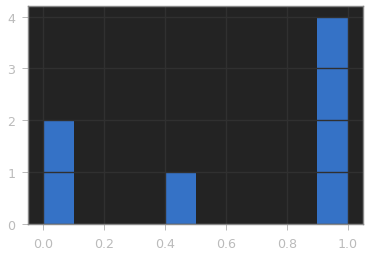

In [6]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

pd.Series(x.value).hist()

However, even these solvers become too slow when the problem becomes too big. When a non-convex problem is untractable, a classical technique is to relax its constraints in order to build an approximation of the problem that is convex. This is called a *convex relaxation*.

Propose a convex relaxation of the knapsack problem for the following data, and solve it with cvxpy:

In [21]:
#Creating n random object values and weights between 0 and 10
n = 1000000
scale = 10

object_values = np.array([np.random.random() * scale for i in range(n) ])
object_weights = np.array([np.random.random() * scale for i in range(n) ])

knapsack_max_weight = (n * scale) / 20

In [34]:
#TOFILL

# Set the variables
c = knapsack_max_weight
d = object_values
e = object_weights

# Construct the problem
x = cp.Variable(n)
objective = cp.Maximize(d @ x)
constraints = [x>=0, x<=1, cp.sum(e @ x) <= c]
prob = cp.Problem(objective, constraints)

# Solve the problem
result = prob.solve()

# On ne le contraint plus à prendre ou pas (boolean) un objet car c'est trop contraint. On lui dit qu'il peut prendre toutes les valeurs entre 0 et 1
# même sémantiquement ca ne veut pas dire grand chose.

In [40]:
print('Valeur totale de tous les objets:', d.sum())
print('Valeur totale du sac:', result)
print("Poids total du sac (kg):", np.dot(x.value, e))

Valeur totale de tous les objets: 5000817.144310526
Valeur totale du sac: 1826017.9737358708
Poids total du sac (kg): 500000.000000013


In [44]:
pd.Series(np.round(x.value, 0)).value_counts()

0.0    726106
1.0    273894
dtype: int64

<AxesSubplot:>

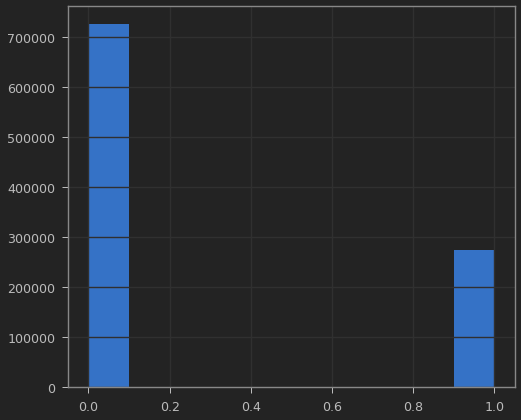

In [50]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
pd.Series(x.value).hist()

As you can see, this yields a useful result, even if the original constraints are not exactly satisfied.

However depending on the problem constraint values, sometimes such approximations doesn't give a very useful result.

# [Optional] Re-assigning electricity production units to each production plant

In this problem you have $k$ electricity production plants, in which there are a total of $n_o$ production units, and for each of them you have its production history as a time series of length *m*. Unfortunately, you don't know which unit belongs to which plant, and some units production history are missing (you only have $n$ units history available), but you know the total production history of each plant. Given these informations, re-assign each unit to its production plant. When you're done try to change the number of plants and the missing ratio to see how far your solution correctly works.

In [ ]:
#Problem generation :

# Number of electricity production units
n_o = 100 
# Number of time steps
m = 5000
# Number of electricity production plants
k = 2
# Ratio of missing production units data
missing_ratio = 0.1

#Production history for each production unit 
unit_productions = np.random.random((n_o,m)) * 10

#Ground truth affectation of each production unit to a production plant
affectations = np.random.choice(k, n_o)

# Number of available production units data
n = int(n_o*(1-missing_ratio)) 

#Available production units 
available_units_indexes = np.random.choice(n_o, n, replace=False)
available_units_affectation = affectations[available_units_indexes]

In [ ]:
#Available data :

#Total production of each plant
total_productions = np.vstack( 
    [ unit_productions[affectations == i].sum(axis=0) for i in range(k) ])

#Available production units data
unit_productions_available = unit_productions[available_units_indexes]

#Goal try to find back in which plant is each production unit only from available data,
#i.e. try to find back the `available_units_affectation` array 

In [ ]:
#TOFILL


What is the link between this problem and the knapsack problem ?

# Part 2 : Other constrained optimization methods

Sometimes when a constrained problem is not convex, or when it is too big to be solved with a convex solver, it can be useful to turn to other techniques to approximately enforce these constraints, such as using penalty functions, or projected gradient descent.

## Constrained linear regression (again)

In the following and to keep a continuity in the course, we will continue with our constrained linear regression problem to approximate the mineral composition of a geological sample, even if in this case, using a convex solver should be preferred as it is a convex problem !

### Replacing constraints with penalties

The first method consists in adding penalties to the error function $f_0$ that correspond to the constraints.

Read https://en.wikipedia.org/wiki/Penalty_method
 
In our case we will use linear penalties to replace :
- inequality constraints $f_i(x) \leq 0 $ by adding in the objective function : $ + \lambda\;\max(0,f_i(x))$
- equality constraints $h_j(x) = 0 $ by adding in the objective function : $ + \lambda |h_j(x)| $

where $\lambda \in \mathbb{R}$ is a new hyperparameter of the model, and controls the importance of the constraints relatively to the original objective function $f_0$.

Hence when replacing constraints with linear penalties the problem becomes :


<div style="font-size: 150%;" align= "center"> 
$\mathrm{minimize} \;\; f_0(x) + \lambda(\max(0,f_i(x)) + |h_j(x)|)$
</div>


First write on paper the corresponding optimization problem when replacing constraints with such penalties for the constrained linear regression problem of the geological sample composition seen before.

To implement this penalized version of the constrained linear regression problem, we will use Keras. Implement first a classic linear regression with Keras without any penalty (and don't forget to not fit the intercept, as we don't want it in our geological example !) :

In [4]:
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *

In [5]:
A = mineral_chemical_compositions
b = sample_chemical_composition

In [6]:
# on crée un modèle qui va faire une régression linéaire (comme ce qu'on faisait en haut avec cvxpy).
# Si un modèle n'a pas de hidden layers, c'est un modèle de régression linéaire.

def linear_regression_model(input_dim):
    """
    Input : 
    input_dim : int : Number of features of the linear regression
    
    Output : 
    model : tf.keras.Model : the keras Model object
    regression_layer : tf.keras.layers.Layer : the keras Layer object 
                        that contains the linear regression coefficients
                        
    """
    #TOFILL
    regression_layer = Dense(1, input_dim=input_dim, use_bias=False) # bias = False parce qu'on veut pas l'intercept, juste les slopes
    model = Sequential([regression_layer]) 
    model.compile(optimizer='adam', loss='mean_absolute_error')

    return model, regression_layer

In [7]:
max_epochs = 2000
batch_size = 10

model, regression_layer = linear_regression_model(A.shape[1])
model.fit(A,b, epochs=max_epochs, batch_size=batch_size)

2022-02-11 15:28:02.313932: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/2000
1/1 [==============================] - 0s 269ms/step - loss: 26.9588
Epoch 2/2000
1/1 [==============================] - 0s 4ms/step - loss: 26.8875
Epoch 3/2000
1/1 [==============================] - 0s 4ms/step - loss: 26.8163
Epoch 4/2000
1/1 [==============================] - 0s 6ms/step - loss: 26.7450
Epoch 5/2000
1/1 [==============================] - 0s 3ms/step - loss: 26.6738
Epoch 6/2000
1/1 [==============================] - 0s 3ms/step - loss: 26.6025
Epoch 7/2000
1/1 [==============================] - 0s 3ms/step - loss: 26.5313
Epoch 8/2000
1/1 [==============================] - 0s 4ms/step - loss: 26.4601
Epoch 9/2000
1/1 [==============================] - 0s 3ms/step - loss: 26.3888
Epoch 10/2000
1/1 [==============================] - 0s 3ms/step - loss: 26.3176
Epoch 11/2000
1/1 [==============================] - 0s 3ms/step - loss: 26.2463
Epoch 12/2000
1/1 [==============================] - 0s 3ms/step - loss: 26.1751
Epoch 13/2000
1/1 [================

1/1 [==============================] - 0s 4ms/step - loss: 19.8629
Epoch 103/2000
1/1 [==============================] - 0s 3ms/step - loss: 19.7929
Epoch 104/2000
1/1 [==============================] - 0s 3ms/step - loss: 19.7228
Epoch 105/2000
1/1 [==============================] - 0s 3ms/step - loss: 19.6546
Epoch 106/2000
1/1 [==============================] - 0s 6ms/step - loss: 19.5832
Epoch 107/2000
1/1 [==============================] - 0s 3ms/step - loss: 19.5135
Epoch 108/2000
1/1 [==============================] - 0s 3ms/step - loss: 19.4438
Epoch 109/2000
1/1 [==============================] - 0s 4ms/step - loss: 19.3740
Epoch 110/2000
1/1 [==============================] - 0s 3ms/step - loss: 19.3042
Epoch 111/2000
1/1 [==============================] - 0s 3ms/step - loss: 19.2344
Epoch 112/2000
1/1 [==============================] - 0s 3ms/step - loss: 19.1649
Epoch 113/2000
1/1 [==============================] - 0s 2ms/step - loss: 19.0954
Epoch 114/2000
1/1 [===========

1/1 [==============================] - ETA: 0s - loss: 13.37 - 0s 3ms/step - loss: 13.3742
Epoch 203/2000
1/1 [==============================] - 0s 3ms/step - loss: 13.3255
Epoch 204/2000
1/1 [==============================] - 0s 3ms/step - loss: 13.2884
Epoch 205/2000
1/1 [==============================] - 0s 3ms/step - loss: 13.2449
Epoch 206/2000
1/1 [==============================] - 0s 5ms/step - loss: 13.1965
Epoch 207/2000
1/1 [==============================] - 0s 3ms/step - loss: 13.1465
Epoch 208/2000
1/1 [==============================] - 0s 4ms/step - loss: 13.1027
Epoch 209/2000
1/1 [==============================] - 0s 3ms/step - loss: 13.0559
Epoch 210/2000
1/1 [==============================] - 0s 4ms/step - loss: 13.0120
Epoch 211/2000
1/1 [==============================] - 0s 3ms/step - loss: 12.9677
Epoch 212/2000
1/1 [==============================] - 0s 3ms/step - loss: 12.9224
Epoch 213/2000
1/1 [==============================] - 0s 3ms/step - loss: 12.8762
Epoch 2

1/1 [==============================] - 0s 5ms/step - loss: 8.9509
Epoch 302/2000
1/1 [==============================] - 0s 7ms/step - loss: 8.9062
Epoch 303/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.8628
Epoch 304/2000
1/1 [==============================] - 0s 5ms/step - loss: 8.8204
Epoch 305/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.7754
Epoch 306/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.7293
Epoch 307/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.6853
Epoch 308/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.6401
Epoch 309/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.5978
Epoch 310/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.5547
Epoch 311/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.5110
Epoch 312/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.4665
Epoch 313/2000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 4.5202
Epoch 403/2000
1/1 [==============================] - 0s 3ms/step - loss: 4.4754
Epoch 404/2000
1/1 [==============================] - 0s 4ms/step - loss: 4.4316
Epoch 405/2000
1/1 [==============================] - 0s 3ms/step - loss: 4.3906
Epoch 406/2000
1/1 [==============================] - 0s 3ms/step - loss: 4.3459
Epoch 407/2000
1/1 [==============================] - 0s 3ms/step - loss: 4.3034
Epoch 408/2000
1/1 [==============================] - 0s 4ms/step - loss: 4.2611
Epoch 409/2000
1/1 [==============================] - 0s 3ms/step - loss: 4.2178
Epoch 410/2000
1/1 [==============================] - 0s 3ms/step - loss: 4.1735
Epoch 411/2000
1/1 [==============================] - 0s 4ms/step - loss: 4.1302
Epoch 412/2000
1/1 [==============================] - 0s 3ms/step - loss: 4.0852
Epoch 413/2000
1/1 [==============================] - 0s 3ms/step - loss: 4.0389
Epoch 414/2000
1/1 [=======================

1/1 [==============================] - 0s 4ms/step - loss: 1.8245
Epoch 504/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.8255
Epoch 505/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.8229
Epoch 506/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.8169
Epoch 507/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.8095
Epoch 508/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.7991
Epoch 509/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.7886
Epoch 510/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.7768
Epoch 511/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.7646
Epoch 512/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.7486
Epoch 513/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.7338
Epoch 514/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.7261
Epoch 515/2000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 1.2743
Epoch 605/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.2723
Epoch 606/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.2660
Epoch 607/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.2657
Epoch 608/2000
1/1 [==============================] - 0s 2ms/step - loss: 1.2670
Epoch 609/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.2646
Epoch 610/2000
1/1 [==============================] - ETA: 0s - loss: 1.258 - 0s 4ms/step - loss: 1.2585
Epoch 611/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.2552
Epoch 612/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.2532
Epoch 613/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.2419
Epoch 614/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.2476
Epoch 615/2000
1/1 [==============================] - 0s 5ms/step - loss: 1.2530
Epoch 616/2000
1/1 

Epoch 705/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.9523
Epoch 706/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.9468
Epoch 707/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.9454
Epoch 708/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.9401
Epoch 709/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.9402
Epoch 710/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.9346
Epoch 711/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.9277
Epoch 712/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.9283
Epoch 713/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.9268
Epoch 714/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.9170
Epoch 715/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.9182
Epoch 716/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.9218
Epoch 717/2000
1/1 [=======

1/1 [==============================] - 0s 2ms/step - loss: 0.7745
Epoch 807/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.7770
Epoch 808/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.7797
Epoch 809/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.7741
Epoch 810/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.7657
Epoch 811/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.7731
Epoch 812/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.7692
Epoch 813/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.7663
Epoch 814/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.7667
Epoch 815/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.7696
Epoch 816/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.7654
Epoch 817/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.7667
Epoch 818/2000
1/1 [=======================

1/1 [==============================] - 0s 4ms/step - loss: 0.7267
Epoch 908/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.7267
Epoch 909/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.7252
Epoch 910/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.7210
Epoch 911/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.7287
Epoch 912/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.7285
Epoch 913/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.7189
Epoch 914/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.7283
Epoch 915/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.7333
Epoch 916/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.7304
Epoch 917/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.7235
Epoch 918/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.7197
Epoch 919/2000
1/1 [=======================

1/1 [==============================] - 0s 4ms/step - loss: 0.7022
Epoch 1008/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.7022
Epoch 1009/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6982
Epoch 1010/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.7028
Epoch 1011/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.7042
Epoch 1012/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6968
Epoch 1013/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.7020
Epoch 1014/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.7049
Epoch 1015/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6952
Epoch 1016/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.7049
Epoch 1017/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.7094
Epoch 1018/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.7059
Epoch 1019/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.6793
Epoch 1108/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6775
Epoch 1109/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6739
Epoch 1110/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6733
Epoch 1111/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6745
Epoch 1112/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6715
Epoch 1113/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6725
Epoch 1114/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6777
Epoch 1115/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6764
Epoch 1116/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6750
Epoch 1117/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6734
Epoch 1118/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6718
Epoch 1119/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.6594
Epoch 1208/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6553
Epoch 1209/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6572
Epoch 1210/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6581
Epoch 1211/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6518
Epoch 1212/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6487
Epoch 1213/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6545
Epoch 1214/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6565
Epoch 1215/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6522
Epoch 1216/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6513
Epoch 1217/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6528
Epoch 1218/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6492
Epoch 1219/2000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.6322
Epoch 1307/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6318
Epoch 1308/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6315
Epoch 1309/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6305
Epoch 1310/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6327
Epoch 1311/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6344
Epoch 1312/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6303
Epoch 1313/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6327
Epoch 1314/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6328
Epoch 1315/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6315
Epoch 1316/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6321
Epoch 1317/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6311
Epoch 1318/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.6278
Epoch 1407/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6243
Epoch 1408/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6126
Epoch 1409/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6210
Epoch 1410/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6298
Epoch 1411/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6242
Epoch 1412/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6245
Epoch 1413/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6238
Epoch 1414/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6145
Epoch 1415/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6111
Epoch 1416/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6203
Epoch 1417/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6192
Epoch 1418/2000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.5948
Epoch 1506/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5997
Epoch 1507/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5956
Epoch 1508/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5936
Epoch 1509/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5976
Epoch 1510/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5984
Epoch 1511/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5904
Epoch 1512/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5924
Epoch 1513/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5969
Epoch 1514/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5913
Epoch 1515/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.5908
Epoch 1516/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5964
Epoch 1517/2000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.5752
Epoch 1605/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5728
Epoch 1606/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5750
Epoch 1607/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5751
Epoch 1608/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5717
Epoch 1609/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5733
Epoch 1610/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5727
Epoch 1611/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5694
Epoch 1612/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5728
Epoch 1613/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5759
Epoch 1614/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5700
Epoch 1615/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5713
Epoch 1616/2000
1/1 [===========

Epoch 1704/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5490
Epoch 1705/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5549
Epoch 1706/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5600
Epoch 1707/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5551
Epoch 1708/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5536
Epoch 1709/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5520
Epoch 1710/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5528
Epoch 1711/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5499
Epoch 1712/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5558
Epoch 1713/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5563
Epoch 1714/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5543
Epoch 1715/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5489
Epoch 1716/2000


1/1 [==============================] - 0s 3ms/step - loss: 0.5290
Epoch 1804/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5289
Epoch 1805/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5277
Epoch 1806/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5274
Epoch 1807/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5319
Epoch 1808/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5302
Epoch 1809/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5284
Epoch 1810/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5291
Epoch 1811/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5265
Epoch 1812/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5243
Epoch 1813/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5291
Epoch 1814/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5288
Epoch 1815/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.5149
Epoch 1904/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5170
Epoch 1905/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5112
Epoch 1906/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5124
Epoch 1907/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5133
Epoch 1908/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5147
Epoch 1909/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5147
Epoch 1910/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5110
Epoch 1911/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5117
Epoch 1912/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5170
Epoch 1913/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5164
Epoch 1914/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5113
Epoch 1915/2000
1/1 [===========

In [8]:
regression_layer.get_weights() # on voit les coefficients de chaque minéraux
# On a pas mis de contrainte donc y'as des coefs négatifs ce qui n'a aucun sens

[array([[ 0.31133604],
        [-0.09218362],
        [ 0.017129  ],
        [ 0.17266266],
        [-0.01569752],
        [ 0.29809088],
        [ 0.5455729 ],
        [ 0.0019582 ],
        [ 0.5103822 ],
        [-0.5768927 ],
        [ 0.21858661],
        [ 0.06771379],
        [-0.15091431]], dtype=float32)]

As we can see, our desired constraints (the coefficients $x \in \mathbb{R}^n$ must be only non-negative values, and must sum to 1) are not naturally respected.

Let's first add the value constraints : $ x \geq 0$ and $x \leq 1$, by adding the corresponding penalties : $\lambda\;\max(0, -x + 0)$ and $\lambda\;\max(0,x - 1 )$.

To do so we will use a custom layer weight regularizer.
Learn about layer regularizers : https://keras.io/api/layers/regularizers/


Let's code a regularizer that add penalties for any minimum and maximum values and not just 0 and 1.
Complete the following code to add the corresponding penalties to the layer weights :

In [26]:
from tensorflow.keras import regularizers
import tensorflow as tf


class LinearBoxPenalties(regularizers.Regularizer):

    def __init__(self, lambda_, min_value, max_value):
        self.lambda_ = lambda_
        self.min_value = min_value
        self.max_value = max_value
        
    def get_config(self):
        return {'lambda': self.lambda_, 'min_value' : self.min_value, 'max_value' : self.max_value}

    def __call__(self, x):
        #TOFILL:
        pen_inegalite_1 = tf.reduce_sum(tf.keras.activations.relu(-x + self.min_value)) # max(self.min_value,(-x))
        pen_inegalite_2 = tf.reduce_sum(tf.keras.activations.relu(x - self.max_value)) # max(0, (x-self.max_value))
        x_constrained = self.lambda_ * (pen_inegalite_1 + pen_inegalite_2)
        return x_constrained

And rewrite your linear regression so that it takes into account your penalty :

In [10]:
def linear_regression_model_with_penalty_cstrs(input_dim, regularizer):
    """
    Input : 
    input_dim : int : Number of features of the linear regression
    regularizer : tf.keras.regularizers.Regularizer : The regularizer object to add to linear regression coefficients
    
    Output : 
    model : tf.keras.Model : the keras Model object
    regression_layer : tf.keras.layers.Layer : the keras Layer object 
                        that contains the linear regression coefficients
                        
    """
    #TOFILL
    regression_layer = Dense(1, input_dim=input_dim, use_bias=False, kernel_regularizer=regularizer)
    model = Sequential([regression_layer]) 
    model.compile(optimizer='adam', loss='mean_absolute_error')
    
    return model, regression_layer

Now retrain your linear regression with your penalty and compare the obtained coefficients with ones you obtained with cvxpy :

In [14]:
penalty_regularizer = LinearBoxPenalties(lambda_ = 10, min_value = 0, max_value = 1)

model, regression_layer = linear_regression_model_with_penalty_cstrs(A.shape[1], penalty_regularizer)

model.fit(A,b, epochs = max_epochs, batch_size = batch_size)

Epoch 1/2000
1/1 [==============================] - 0s 284ms/step - loss: 34.6989
Epoch 2/2000
1/1 [==============================] - 0s 4ms/step - loss: 34.5861
Epoch 3/2000
1/1 [==============================] - 0s 3ms/step - loss: 34.4734
Epoch 4/2000
1/1 [==============================] - 0s 3ms/step - loss: 34.3606
Epoch 5/2000
1/1 [==============================] - 0s 4ms/step - loss: 34.2478
Epoch 6/2000
1/1 [==============================] - 0s 4ms/step - loss: 34.1351
Epoch 7/2000
1/1 [==============================] - 0s 2ms/step - loss: 34.0223
Epoch 8/2000
1/1 [==============================] - 0s 2ms/step - loss: 33.9096
Epoch 9/2000
1/1 [==============================] - 0s 2ms/step - loss: 33.7968
Epoch 10/2000
1/1 [==============================] - 0s 3ms/step - loss: 33.6840
Epoch 11/2000
1/1 [==============================] - 0s 7ms/step - loss: 33.5713
Epoch 12/2000
1/1 [==============================] - 0s 3ms/step - loss: 33.4585
Epoch 13/2000
1/1 [================

1/1 [==============================] - 0s 2ms/step - loss: 23.6899
Epoch 103/2000
1/1 [==============================] - 0s 14ms/step - loss: 23.5933
Epoch 104/2000
1/1 [==============================] - 0s 3ms/step - loss: 23.4967
Epoch 105/2000
1/1 [==============================] - 0s 3ms/step - loss: 23.4000
Epoch 106/2000
1/1 [==============================] - 0s 3ms/step - loss: 23.3033
Epoch 107/2000
1/1 [==============================] - 0s 3ms/step - loss: 23.2066
Epoch 108/2000
1/1 [==============================] - 0s 3ms/step - loss: 23.1098
Epoch 109/2000
1/1 [==============================] - 0s 3ms/step - loss: 23.0131
Epoch 110/2000
1/1 [==============================] - 0s 3ms/step - loss: 22.9163
Epoch 111/2000
1/1 [==============================] - 0s 3ms/step - loss: 22.8196
Epoch 112/2000
1/1 [==============================] - 0s 3ms/step - loss: 22.7228
Epoch 113/2000
1/1 [==============================] - 0s 3ms/step - loss: 22.6260
Epoch 114/2000
1/1 [==========

Epoch 202/2000
1/1 [==============================] - 0s 3ms/step - loss: 16.4799
Epoch 203/2000
1/1 [==============================] - 0s 3ms/step - loss: 16.4237
Epoch 204/2000
1/1 [==============================] - 0s 2ms/step - loss: 16.3668
Epoch 205/2000
1/1 [==============================] - 0s 3ms/step - loss: 16.3091
Epoch 206/2000
1/1 [==============================] - 0s 3ms/step - loss: 16.2565
Epoch 207/2000
1/1 [==============================] - 0s 3ms/step - loss: 16.2016
Epoch 208/2000
1/1 [==============================] - 0s 3ms/step - loss: 16.1427
Epoch 209/2000
1/1 [==============================] - 0s 4ms/step - loss: 16.0858
Epoch 210/2000
1/1 [==============================] - 0s 3ms/step - loss: 16.0344
Epoch 211/2000
1/1 [==============================] - 0s 3ms/step - loss: 15.9776
Epoch 212/2000
1/1 [==============================] - 0s 3ms/step - loss: 15.9233
Epoch 213/2000
1/1 [==============================] - 0s 3ms/step - loss: 15.8725
Epoch 214/2000
1

1/1 [==============================] - 0s 3ms/step - loss: 11.0429
Epoch 302/2000
1/1 [==============================] - 0s 3ms/step - loss: 10.9959
Epoch 303/2000
1/1 [==============================] - 0s 3ms/step - loss: 10.9564
Epoch 304/2000
1/1 [==============================] - 0s 3ms/step - loss: 10.9191
Epoch 305/2000
1/1 [==============================] - 0s 3ms/step - loss: 10.8772
Epoch 306/2000
1/1 [==============================] - 0s 4ms/step - loss: 10.8308
Epoch 307/2000
1/1 [==============================] - 0s 3ms/step - loss: 10.7880
Epoch 308/2000
1/1 [==============================] - 0s 4ms/step - loss: 10.7435
Epoch 309/2000
1/1 [==============================] - 0s 3ms/step - loss: 10.7042
Epoch 310/2000
1/1 [==============================] - 0s 3ms/step - loss: 10.6612
Epoch 311/2000
1/1 [==============================] - 0s 4ms/step - loss: 10.6202
Epoch 312/2000
1/1 [==============================] - 0s 12ms/step - loss: 10.5794
Epoch 313/2000
1/1 [==========

1/1 [==============================] - 0s 4ms/step - loss: 6.8823
Epoch 403/2000
1/1 [==============================] - 0s 3ms/step - loss: 6.8491
Epoch 404/2000
1/1 [==============================] - 0s 4ms/step - loss: 6.8173
Epoch 405/2000
1/1 [==============================] - 0s 3ms/step - loss: 6.7908
Epoch 406/2000
1/1 [==============================] - 0s 3ms/step - loss: 6.7600
Epoch 407/2000
1/1 [==============================] - 0s 3ms/step - loss: 6.7261
Epoch 408/2000
1/1 [==============================] - 0s 4ms/step - loss: 6.6908
Epoch 409/2000
1/1 [==============================] - 0s 3ms/step - loss: 6.6561
Epoch 410/2000
1/1 [==============================] - 0s 3ms/step - loss: 6.6255
Epoch 411/2000
1/1 [==============================] - 0s 4ms/step - loss: 6.5938
Epoch 412/2000
1/1 [==============================] - 0s 3ms/step - loss: 6.5633
Epoch 413/2000
1/1 [==============================] - ETA: 0s - loss: 6.531 - 0s 4ms/step - loss: 6.5313
Epoch 414/2000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 3.6914
Epoch 504/2000
1/1 [==============================] - 0s 4ms/step - loss: 3.6629
Epoch 505/2000
1/1 [==============================] - 0s 4ms/step - loss: 3.6421
Epoch 506/2000
1/1 [==============================] - 0s 4ms/step - loss: 3.6167
Epoch 507/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.5862
Epoch 508/2000
1/1 [==============================] - 0s 5ms/step - loss: 3.5573
Epoch 509/2000
1/1 [==============================] - 0s 4ms/step - loss: 3.5319
Epoch 510/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.5032
Epoch 511/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.4732
Epoch 512/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.4488
Epoch 513/2000
1/1 [==============================] - 0s 4ms/step - loss: 3.4245
Epoch 514/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.3958
Epoch 515/2000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 1.6740
Epoch 605/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.6647
Epoch 606/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.6549
Epoch 607/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.6422
Epoch 608/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.6256
Epoch 609/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.6193
Epoch 610/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.6115
Epoch 611/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.5956
Epoch 612/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.5896
Epoch 613/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.5831
Epoch 614/2000
1/1 [==============================] - 0s 7ms/step - loss: 1.5728
Epoch 615/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.5590
Epoch 616/2000
1/1 [=======================

1/1 [==============================] - 0s 4ms/step - loss: 0.6371
Epoch 706/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6255
Epoch 707/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6196
Epoch 708/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6087
Epoch 709/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6008
Epoch 710/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5893
Epoch 711/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5836
Epoch 712/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.5759
Epoch 713/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5656
Epoch 714/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5491
Epoch 715/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5468
Epoch 716/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5430
Epoch 717/2000
1/1 [======================

1/1 [==============================] - 0s 3ms/step - loss: 0.0724
Epoch 807/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0736
Epoch 808/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0685
Epoch 809/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0662
Epoch 810/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0645
Epoch 811/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0663
Epoch 812/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0651
Epoch 813/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0615
Epoch 814/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0602
Epoch 815/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0624
Epoch 816/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0560
Epoch 817/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0602
Epoch 818/2000
1/1 [=======================

1/1 [==============================] - 0s 4ms/step - loss: 0.0233
Epoch 908/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0229
Epoch 909/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0225
Epoch 910/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0241
Epoch 911/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0236
Epoch 912/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0220
Epoch 913/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0226
Epoch 914/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0250
Epoch 915/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0226
Epoch 916/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0272
Epoch 917/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0253
Epoch 918/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0260
Epoch 919/2000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 0.0247
Epoch 1009/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0227
Epoch 1010/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 1011/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0230
Epoch 1012/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0181
Epoch 1013/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0279
Epoch 1014/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0297
Epoch 1015/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0258
Epoch 1016/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0234
Epoch 1017/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0251
Epoch 1018/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0198
Epoch 1019/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0197
Epoch 1020/2000
1/1 [===========

1/1 [==============================] - 0s 7ms/step - loss: 0.0202
Epoch 1109/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0175
Epoch 1110/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0174
Epoch 1111/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0163
Epoch 1112/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0162
Epoch 1113/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0208
Epoch 1114/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0188
Epoch 1115/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0193
Epoch 1116/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0194
Epoch 1117/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0183
Epoch 1118/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0176
Epoch 1119/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0183
Epoch 1120/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0232
Epoch 1209/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0321
Epoch 1210/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0318
Epoch 1211/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0201
Epoch 1212/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0227
Epoch 1213/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0328
Epoch 1214/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0328
Epoch 1215/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0192
Epoch 1216/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0200
Epoch 1217/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0284
Epoch 1218/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0242
Epoch 1219/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0143
Epoch 1220/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0153
Epoch 1309/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0146
Epoch 1310/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0122
Epoch 1311/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0141
Epoch 1312/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0145
Epoch 1313/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0144
Epoch 1314/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0094
Epoch 1315/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0196
Epoch 1316/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0191
Epoch 1317/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0179
Epoch 1318/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0156
Epoch 1319/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 1320/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0085
Epoch 1409/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0153
Epoch 1410/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0187
Epoch 1411/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 1412/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0151
Epoch 1413/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0185
Epoch 1414/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0145
Epoch 1415/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0131
Epoch 1416/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0122
Epoch 1417/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0130
Epoch 1418/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0150
Epoch 1419/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0146
Epoch 1420/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0205
Epoch 1509/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0141
Epoch 1510/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0125
Epoch 1511/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0137
Epoch 1512/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0158
Epoch 1513/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0162
Epoch 1514/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0130
Epoch 1515/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0096
Epoch 1516/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0129
Epoch 1517/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0157
Epoch 1518/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0125
Epoch 1519/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0138
Epoch 1520/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 1609/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0125
Epoch 1610/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0138
Epoch 1611/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 1612/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0119
Epoch 1613/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0089
Epoch 1614/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0094
Epoch 1615/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0089
Epoch 1616/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0074
Epoch 1617/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0090
Epoch 1618/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0096
Epoch 1619/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0081
Epoch 1620/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0152
Epoch 1709/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0101
Epoch 1710/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0165
Epoch 1711/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0190
Epoch 1712/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0184
Epoch 1713/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0134
Epoch 1714/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0139
Epoch 1715/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0149
Epoch 1716/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0141
Epoch 1717/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0101
Epoch 1718/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0117
Epoch 1719/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0077
Epoch 1720/2000
1/1 [===========

1/1 [==============================] - 0s 5ms/step - loss: 0.0138
Epoch 1809/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0122
Epoch 1810/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0225
Epoch 1811/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0238
Epoch 1812/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0132
Epoch 1813/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0191
Epoch 1814/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0264
Epoch 1815/2000
1/1 [==============================] - 0s 14ms/step - loss: 0.0209
Epoch 1816/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0141
Epoch 1817/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0187
Epoch 1818/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0186
Epoch 1819/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0181
Epoch 1820/2000
1/1 [==========

1/1 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 1909/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0130
Epoch 1910/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 1911/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0201
Epoch 1912/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 1913/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0098
Epoch 1914/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0124
Epoch 1915/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0108
Epoch 1916/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0093
Epoch 1917/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0137
Epoch 1918/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0207
Epoch 1919/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 1920/2000
1/1 [===========

In [15]:
#TOFILL
regression_layer.get_weights()

[array([[3.0308524e-01],
        [3.0877447e-01],
        [1.9095364e-01],
        [6.1018276e-04],
        [1.4828502e-01],
        [5.2035772e-03],
        [2.8278682e-02],
        [3.2662977e-03],
        [4.6631970e-02],
        [3.5888054e-03],
        [1.4505190e-03],
        [1.5632287e-03],
        [1.9999318e-04]], dtype=float32)]

In [20]:
print(tf.reduce_sum(regression_layer.get_weights())) # les coefs sont entre 0 et 1 mais la somme n'est pas = 1

tf.Tensor(1.0418917, shape=(), dtype=float32)


We can see that the min and max constraints are well satisfied, however the coefficient still doesn't sum to one. 

Complete the following code to add both a min and max values penalties, as well as the sum penalty $ \lambda |\sum_i(x_i) - 1|$ :

In [29]:
from tensorflow.keras import regularizers
import tensorflow as tf


class LinearBoxAndSumPenalties(regularizers.Regularizer):

    def __init__(self, lambda_, min_value, max_value, sum_value):
        self.lambda_ = lambda_
        self.min_value = min_value
        self.max_value = max_value
        self.sum_value = sum_value
        
    def get_config(self):
        return {'lambda': self.lambda_, 'min_value' : self.min_value, 
                'max_value' : self.max_value, 'sum_value' : self.sum_value }
    

    def __call__(self, x):
        #TOFILL
        pen_inegalite_1 = tf.reduce_sum(tf.keras.activations.relu(-x + self.min_value)) # max(self.min_value,(-x))
        pen_inegalite_2 = tf.reduce_sum(tf.keras.activations.relu(x - self.max_value)) # max(0, (x-self.max_value))
        pen_sum = abs(tf.reduce_sum(x)- self.sum_value)
        x_constrained = self.lambda_ * (pen_inegalite_1 + pen_inegalite_2 + pen_sum)
        return x_constrained

In [30]:
penalty_regularizer = LinearBoxAndSumPenalties(lambda_ = 10, min_value = 0, max_value = 1, sum_value = 1)

model, regression_layer = linear_regression_model_with_penalty_cstrs(A.shape[1], penalty_regularizer)

model.fit(A,b, epochs=max_epochs, batch_size=batch_size)

Epoch 1/2000
1/1 [==============================] - 0s 327ms/step - loss: 55.0450
Epoch 2/2000
1/1 [==============================] - 0s 5ms/step - loss: 54.7674
Epoch 3/2000
1/1 [==============================] - 0s 4ms/step - loss: 54.4898
Epoch 4/2000
1/1 [==============================] - 0s 4ms/step - loss: 54.2122
Epoch 5/2000
1/1 [==============================] - 0s 3ms/step - loss: 53.9347
Epoch 6/2000
1/1 [==============================] - 0s 3ms/step - loss: 53.6571
Epoch 7/2000
1/1 [==============================] - 0s 3ms/step - loss: 53.3795
Epoch 8/2000
1/1 [==============================] - 0s 4ms/step - loss: 53.1020
Epoch 9/2000
1/1 [==============================] - 0s 3ms/step - loss: 52.8244
Epoch 10/2000
1/1 [==============================] - 0s 3ms/step - loss: 52.5468
Epoch 11/2000
1/1 [==============================] - 0s 10ms/step - loss: 52.2692
Epoch 12/2000
1/1 [==============================] - 0s 8ms/step - loss: 51.9917
Epoch 13/2000
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 31.0303
Epoch 103/2000
1/1 [==============================] - 0s 3ms/step - loss: 30.8311
Epoch 104/2000
1/1 [==============================] - 0s 7ms/step - loss: 30.6318
Epoch 105/2000
1/1 [==============================] - 0s 4ms/step - loss: 30.4324
Epoch 106/2000
1/1 [==============================] - 0s 4ms/step - loss: 30.2329
Epoch 107/2000
1/1 [==============================] - 0s 7ms/step - loss: 30.0333
Epoch 108/2000
1/1 [==============================] - 0s 4ms/step - loss: 29.8337
Epoch 109/2000
1/1 [==============================] - 0s 6ms/step - loss: 29.6340
Epoch 110/2000
1/1 [==============================] - 0s 11ms/step - loss: 29.4341
Epoch 111/2000
1/1 [==============================] - 0s 3ms/step - loss: 29.2343
Epoch 112/2000
1/1 [==============================] - 0s 6ms/step - loss: 29.0343
Epoch 113/2000
1/1 [==============================] - 0s 5ms/step - loss: 28.8342
Epoch 114/2000
1/1 [==========

1/1 [==============================] - 0s 3ms/step - loss: 21.3017
Epoch 203/2000
1/1 [==============================] - 0s 4ms/step - loss: 21.2504
Epoch 204/2000
1/1 [==============================] - 0s 3ms/step - loss: 21.1957
Epoch 205/2000
1/1 [==============================] - 0s 6ms/step - loss: 21.1380
Epoch 206/2000
1/1 [==============================] - 0s 7ms/step - loss: 21.0872
Epoch 207/2000
1/1 [==============================] - 0s 4ms/step - loss: 21.0405
Epoch 208/2000
1/1 [==============================] - 0s 5ms/step - loss: 21.0101
Epoch 209/2000
1/1 [==============================] - 0s 4ms/step - loss: 20.9796
Epoch 210/2000
1/1 [==============================] - 0s 13ms/step - loss: 20.9532
Epoch 211/2000
1/1 [==============================] - 0s 4ms/step - loss: 20.9215
Epoch 212/2000
1/1 [==============================] - 0s 6ms/step - loss: 20.8895
Epoch 213/2000
1/1 [==============================] - 0s 4ms/step - loss: 20.8657
Epoch 214/2000
1/1 [==========

1/1 [==============================] - 0s 6ms/step - loss: 18.5040
Epoch 303/2000
1/1 [==============================] - 0s 5ms/step - loss: 18.4793
Epoch 304/2000
1/1 [==============================] - 0s 6ms/step - loss: 18.4452
Epoch 305/2000
1/1 [==============================] - 0s 3ms/step - loss: 18.4051
Epoch 306/2000
1/1 [==============================] - 0s 4ms/step - loss: 18.3990
Epoch 307/2000
1/1 [==============================] - 0s 3ms/step - loss: 18.3784
Epoch 308/2000
1/1 [==============================] - 0s 5ms/step - loss: 18.3317
Epoch 309/2000
1/1 [==============================] - 0s 6ms/step - loss: 18.3252
Epoch 310/2000
1/1 [==============================] - 0s 5ms/step - loss: 18.3170
Epoch 311/2000
1/1 [==============================] - 0s 3ms/step - loss: 18.2977
Epoch 312/2000
1/1 [==============================] - 0s 3ms/step - loss: 18.2680
Epoch 313/2000
1/1 [==============================] - 0s 3ms/step - loss: 18.2289
Epoch 314/2000
1/1 [===========

1/1 [==============================] - 0s 5ms/step - loss: 16.0513
Epoch 403/2000
1/1 [==============================] - 0s 5ms/step - loss: 16.0214
Epoch 404/2000
1/1 [==============================] - 0s 3ms/step - loss: 16.0070
Epoch 405/2000
1/1 [==============================] - 0s 13ms/step - loss: 15.9881
Epoch 406/2000
1/1 [==============================] - 0s 7ms/step - loss: 15.9587
Epoch 407/2000
1/1 [==============================] - 0s 9ms/step - loss: 15.9237
Epoch 408/2000
1/1 [==============================] - 0s 4ms/step - loss: 15.9195
Epoch 409/2000
1/1 [==============================] - 0s 4ms/step - loss: 15.8928
Epoch 410/2000
1/1 [==============================] - 0s 5ms/step - loss: 15.8486
Epoch 411/2000
1/1 [==============================] - 0s 5ms/step - loss: 15.8282
Epoch 412/2000
1/1 [==============================] - 0s 6ms/step - loss: 15.8008
Epoch 413/2000
1/1 [==============================] - 0s 3ms/step - loss: 15.7897
Epoch 414/2000
1/1 [==========

1/1 [==============================] - 0s 3ms/step - loss: 13.6066
Epoch 502/2000
1/1 [==============================] - 0s 5ms/step - loss: 13.5653
Epoch 503/2000
1/1 [==============================] - 0s 5ms/step - loss: 13.5749
Epoch 504/2000
1/1 [==============================] - 0s 14ms/step - loss: 13.5571
Epoch 505/2000
1/1 [==============================] - 0s 6ms/step - loss: 13.5112
Epoch 506/2000
1/1 [==============================] - 0s 6ms/step - loss: 13.4787
Epoch 507/2000
1/1 [==============================] - 0s 4ms/step - loss: 13.4688
Epoch 508/2000
1/1 [==============================] - 0s 6ms/step - loss: 13.4515
Epoch 509/2000
1/1 [==============================] - 0s 5ms/step - loss: 13.4258
Epoch 510/2000
1/1 [==============================] - 0s 3ms/step - loss: 13.3902
Epoch 511/2000
1/1 [==============================] - 0s 5ms/step - loss: 13.3825
Epoch 512/2000
1/1 [==============================] - 0s 4ms/step - loss: 13.3742
Epoch 513/2000
1/1 [==========

1/1 [==============================] - 0s 5ms/step - loss: 11.8149
Epoch 602/2000
1/1 [==============================] - 0s 5ms/step - loss: 11.7934
Epoch 603/2000
1/1 [==============================] - 0s 5ms/step - loss: 11.7608
Epoch 604/2000
1/1 [==============================] - 0s 4ms/step - loss: 11.7510
Epoch 605/2000
1/1 [==============================] - 0s 3ms/step - loss: 11.7423
Epoch 606/2000
1/1 [==============================] - 0s 5ms/step - loss: 11.7109
Epoch 607/2000
1/1 [==============================] - 0s 5ms/step - loss: 11.6925
Epoch 608/2000
1/1 [==============================] - 0s 6ms/step - loss: 11.6850
Epoch 609/2000
1/1 [==============================] - 0s 4ms/step - loss: 11.6661
Epoch 610/2000
1/1 [==============================] - 0s 8ms/step - loss: 11.6369
Epoch 611/2000
1/1 [==============================] - 0s 6ms/step - loss: 11.6247
Epoch 612/2000
1/1 [==============================] - 0s 3ms/step - loss: 11.6165
Epoch 613/2000
1/1 [===========

1/1 [==============================] - 0s 5ms/step - loss: 10.0481
Epoch 702/2000
1/1 [==============================] - 0s 5ms/step - loss: 10.0395
Epoch 703/2000
1/1 [==============================] - 0s 4ms/step - loss: 10.0077
Epoch 704/2000
1/1 [==============================] - 0s 4ms/step - loss: 9.9672
Epoch 705/2000
1/1 [==============================] - 0s 5ms/step - loss: 9.9595
Epoch 706/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.9390
Epoch 707/2000
1/1 [==============================] - 0s 22ms/step - loss: 9.9204
Epoch 708/2000
1/1 [==============================] - 0s 4ms/step - loss: 9.9031
Epoch 709/2000
1/1 [==============================] - 0s 4ms/step - loss: 9.8812
Epoch 710/2000
1/1 [==============================] - 0s 7ms/step - loss: 9.8627
Epoch 711/2000
1/1 [==============================] - 0s 7ms/step - loss: 9.8454
Epoch 712/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.8294
Epoch 713/2000
1/1 [===================

1/1 [==============================] - 0s 10ms/step - loss: 8.2351
Epoch 803/2000
1/1 [==============================] - 0s 15ms/step - loss: 8.2057
Epoch 804/2000
1/1 [==============================] - 0s 6ms/step - loss: 8.1803
Epoch 805/2000
1/1 [==============================] - 0s 7ms/step - loss: 8.1746
Epoch 806/2000
1/1 [==============================] - 0s 6ms/step - loss: 8.1447
Epoch 807/2000
1/1 [==============================] - 0s 6ms/step - loss: 8.1343
Epoch 808/2000
1/1 [==============================] - 0s 6ms/step - loss: 8.1257
Epoch 809/2000
1/1 [==============================] - 0s 7ms/step - loss: 8.1066
Epoch 810/2000
1/1 [==============================] - 0s 5ms/step - loss: 8.0778
Epoch 811/2000
1/1 [==============================] - 0s 5ms/step - loss: 8.0594
Epoch 812/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.0526
Epoch 813/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.0205
Epoch 814/2000
1/1 [=====================

1/1 [==============================] - 0s 3ms/step - loss: 6.4383
Epoch 904/2000
1/1 [==============================] - 0s 4ms/step - loss: 6.4189
Epoch 905/2000
1/1 [==============================] - 0s 3ms/step - loss: 6.3887
Epoch 906/2000
1/1 [==============================] - 0s 3ms/step - loss: 6.3489
Epoch 907/2000
1/1 [==============================] - 0s 4ms/step - loss: 6.3310
Epoch 908/2000
1/1 [==============================] - 0s 3ms/step - loss: 6.3291
Epoch 909/2000
1/1 [==============================] - 0s 3ms/step - loss: 6.2969
Epoch 910/2000
1/1 [==============================] - 0s 3ms/step - loss: 6.2699
Epoch 911/2000
1/1 [==============================] - 0s 3ms/step - loss: 6.2636
Epoch 912/2000
1/1 [==============================] - 0s 3ms/step - loss: 6.2452
Epoch 913/2000
1/1 [==============================] - 0s 4ms/step - loss: 6.2173
Epoch 914/2000
1/1 [==============================] - 0s 3ms/step - loss: 6.1994
Epoch 915/2000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 4.8906
Epoch 1005/2000
1/1 [==============================] - 0s 3ms/step - loss: 4.8652
Epoch 1006/2000
1/1 [==============================] - 0s 3ms/step - loss: 4.8566
Epoch 1007/2000
1/1 [==============================] - 0s 4ms/step - loss: 4.8501
Epoch 1008/2000
1/1 [==============================] - 0s 3ms/step - loss: 4.8300
Epoch 1009/2000
1/1 [==============================] - 0s 4ms/step - loss: 4.8099
Epoch 1010/2000
1/1 [==============================] - 0s 4ms/step - loss: 4.7999
Epoch 1011/2000
1/1 [==============================] - 0s 3ms/step - loss: 4.7831
Epoch 1012/2000
1/1 [==============================] - 0s 5ms/step - loss: 4.7767
Epoch 1013/2000
1/1 [==============================] - 0s 4ms/step - loss: 4.7674
Epoch 1014/2000
1/1 [==============================] - 0s 3ms/step - loss: 4.7432
Epoch 1015/2000
1/1 [==============================] - 0s 3ms/step - loss: 4.7476
Epoch 1016/2000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 3.5989
Epoch 1105/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.5839
Epoch 1106/2000
1/1 [==============================] - 0s 4ms/step - loss: 3.5666
Epoch 1107/2000
1/1 [==============================] - 0s 4ms/step - loss: 3.5531
Epoch 1108/2000
1/1 [==============================] - 0s 4ms/step - loss: 3.5479
Epoch 1109/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.5339
Epoch 1110/2000
1/1 [==============================] - 0s 4ms/step - loss: 3.5321
Epoch 1111/2000
1/1 [==============================] - 0s 4ms/step - loss: 3.5143
Epoch 1112/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.5048
Epoch 1113/2000
1/1 [==============================] - 0s 4ms/step - loss: 3.4916
Epoch 1114/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.4841
Epoch 1115/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.4769
Epoch 1116/2000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 2.6655
Epoch 1205/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.6654
Epoch 1206/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.6605
Epoch 1207/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.6535
Epoch 1208/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.6648
Epoch 1209/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.6586
Epoch 1210/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.6459
Epoch 1211/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.6521
Epoch 1212/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.6372
Epoch 1213/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.6527
Epoch 1214/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.6539
Epoch 1215/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.6364
Epoch 1216/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 2.3588
Epoch 1305/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.3515
Epoch 1306/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.3611
Epoch 1307/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.3501
Epoch 1308/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.3597
Epoch 1309/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.3620
Epoch 1310/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.3468
Epoch 1311/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.3513
Epoch 1312/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.3567
Epoch 1313/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.3431
Epoch 1314/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.3392
Epoch 1315/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.3508
Epoch 1316/2000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 2.1428
Epoch 1405/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.1337
Epoch 1406/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.1097
Epoch 1407/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.1166
Epoch 1408/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.1245
Epoch 1409/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.1092
Epoch 1410/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.1010
Epoch 1411/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.1105
Epoch 1412/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.1056
Epoch 1413/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.0903
Epoch 1414/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.0996
Epoch 1415/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.0999
Epoch 1416/2000
1/1 [===========

1/1 [==============================] - 0s 7ms/step - loss: 1.8795
Epoch 1505/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.8658
Epoch 1506/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.8761
Epoch 1507/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.8815
Epoch 1508/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.8643
Epoch 1509/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.8568
Epoch 1510/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.8632
Epoch 1511/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.8692
Epoch 1512/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.8580
Epoch 1513/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.8404
Epoch 1514/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.8564
Epoch 1515/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.8597
Epoch 1516/2000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 1.6417
Epoch 1604/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.6229
Epoch 1605/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.6072
Epoch 1606/2000
1/1 [==============================] - 0s 2ms/step - loss: 1.6374
Epoch 1607/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.6454
Epoch 1608/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.6296
Epoch 1609/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.5989
Epoch 1610/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.6055
Epoch 1611/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.6050
Epoch 1612/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.5966
Epoch 1613/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.5848
Epoch 1614/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.6004
Epoch 1615/2000
1/1 [===========

1/1 [==============================] - 0s 6ms/step - loss: 1.4778
Epoch 1704/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.4658
Epoch 1705/2000
1/1 [==============================] - 0s 10ms/step - loss: 1.4687
Epoch 1706/2000
1/1 [==============================] - 0s 7ms/step - loss: 1.4572
Epoch 1707/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.4562
Epoch 1708/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.4694
Epoch 1709/2000
1/1 [==============================] - 0s 5ms/step - loss: 1.4664
Epoch 1710/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.4583
Epoch 1711/2000
1/1 [==============================] - 0s 5ms/step - loss: 1.4741
Epoch 1712/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.4759
Epoch 1713/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.4585
Epoch 1714/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.4706
Epoch 1715/2000
1/1 [==========

1/1 [==============================] - 0s 3ms/step - loss: 1.3873
Epoch 1804/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.3735
Epoch 1805/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.3793
Epoch 1806/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.3919
Epoch 1807/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.3875
Epoch 1808/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.3683
Epoch 1809/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.3772
Epoch 1810/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.3800
Epoch 1811/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.3597
Epoch 1812/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.3846
Epoch 1813/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.3961
Epoch 1814/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.3778
Epoch 1815/2000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 1.2986
Epoch 1904/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.2820
Epoch 1905/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.3026
Epoch 1906/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.3090
Epoch 1907/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.2881
Epoch 1908/2000
1/1 [==============================] - 0s 5ms/step - loss: 1.2906
Epoch 1909/2000
1/1 [==============================] - 0s 5ms/step - loss: 1.3014
Epoch 1910/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.2907
Epoch 1911/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.2786
Epoch 1912/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.2912
Epoch 1913/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.2815
Epoch 1914/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.2766
Epoch 1915/2000
1/1 [===========

In [17]:
#TOFILL
print(regression_layer.get_weights())
print(tf.reduce_sum(regression_layer.get_weights()))

[array([[2.4633221e-01],
       [2.0063935e-01],
       [2.8349337e-01],
       [8.7972716e-05],
       [1.3359305e-01],
       [6.4516705e-03],
       [3.5317484e-02],
       [3.0801718e-03],
       [8.9460358e-02],
       [8.2209700e-04],
       [1.1770272e-03],
       [2.2238611e-04],
       [5.5452918e-05]], dtype=float32)]
tf.Tensor(1.0007325, shape=(), dtype=float32)


<AxesSubplot:>

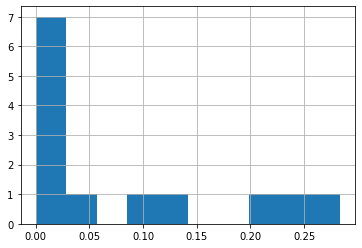

In [18]:
pd.Series(regression_layer.get_weights()).hist() # par rapport aux fonctions convexes, ici la majorité des coefs sont répartis entre 0 et 1
# les coefs ne sont pas tous soit proches de 0 ou de 1

Play with lambda and see how it changes the obtained $x$ values compared to the result of the convex approach.

### Enforcing constraints with projected gradient descent

The other main method to use constraints with problems that cannot be solved by convex solvers is called *projected gradient descent*. The idea is pretty simple, we only $\mathrm{minimize}\;f_0(x)$ with gradient descent, and after each gradient update, we have a look at the parameters, if they do not respect the constraints, then we modify them so that they respect the constraints. In other words we project the parameters values on the surface of the parameter-values set that respect the constraints.

In our case that means that if any coefficient in $x$ is below 0, we replace it by zero ; if any coefficient in $x$ is above 1, we replace it by one ; and if $x$ doesn't sum to 1, we rescale all the coefficients in $x$ so that they do.

Again we can do this in Keras, with the layer weights constraints : https://keras.io/api/layers/constraints/

Let's code a constraint that replaces the layer wieghts below a minimum value by this value, and above a maximum value by this other value.

Complete the following code to add these projection steps to your layer weights :

In [31]:
from keras.constraints import Constraint
import keras.backend as K

class ProjectedBoxConstraint(Constraint):
    def __init__(self, min_value, max_value):
        self.min_value = min_value
        self.max_value = max_value
        
    def get_config(self):
        return {'min_value': self.min_value,
                'max_value': self.max_value}
    
    def __call__(self, w):
        #TOFILL
        w0 = tf.maximum(w, self.min_value)
        w1 = tf.minimum(w0, self.max_value)
        return w1

In [34]:
def linear_regression_model_with_projected_cstrs(input_dim, cstr):
    """
    Input : 
    input_dim : int : Number of features of the linear regression
    cstr : tf.keras.constraints.Constraint : the keras Constraint object 
                        that contains the projection operations to satisfy the constraints
    
    Output : 
    model : tf.keras.Model : the keras Model object
    regression_layer : tf.keras.layers.Layer : the keras Layer object 
                        that contains the linear regression coefficients
                        
    """
    #TOFILL
    regression_layer = Dense(1, input_dim=input_dim, use_bias=False, kernel_constraint=cstr)
    model = Sequential([regression_layer]) 
    model.compile(optimizer='adam', loss='mean_absolute_error')
    
    return model, regression_layer

In [35]:
projected_constraint = ProjectedBoxConstraint(min_value = 0, max_value = 1)

model, regression_layer = linear_regression_model_with_projected_cstrs(A.shape[1], projected_constraint)

model.fit(A,b, epochs=max_epochs, batch_size=batch_size)

Epoch 1/2000
1/1 [==============================] - 0s 238ms/step - loss: 15.8718
Epoch 2/2000
1/1 [==============================] - 0s 7ms/step - loss: 10.9345
Epoch 3/2000
1/1 [==============================] - 0s 5ms/step - loss: 10.9093
Epoch 4/2000
1/1 [==============================] - 0s 4ms/step - loss: 10.8724
Epoch 5/2000
1/1 [==============================] - 0s 4ms/step - loss: 10.8328
Epoch 6/2000
1/1 [==============================] - 0s 7ms/step - loss: 10.7909
Epoch 7/2000
1/1 [==============================] - 0s 4ms/step - loss: 10.7474
Epoch 8/2000
1/1 [==============================] - 0s 9ms/step - loss: 10.7029
Epoch 9/2000
1/1 [==============================] - 0s 4ms/step - loss: 10.6577
Epoch 10/2000
1/1 [==============================] - 0s 5ms/step - loss: 10.6118
Epoch 11/2000
1/1 [==============================] - 0s 5ms/step - loss: 10.5655
Epoch 12/2000
1/1 [==============================] - 0s 5ms/step - loss: 10.5188
Epoch 13/2000
1/1 [================

1/1 [==============================] - 0s 14ms/step - loss: 7.4212
Epoch 104/2000
1/1 [==============================] - 0s 3ms/step - loss: 7.3973
Epoch 105/2000
1/1 [==============================] - 0s 12ms/step - loss: 7.3737
Epoch 106/2000
1/1 [==============================] - 0s 5ms/step - loss: 7.3489
Epoch 107/2000
1/1 [==============================] - 0s 5ms/step - loss: 7.3246
Epoch 108/2000
1/1 [==============================] - 0s 4ms/step - loss: 7.3003
Epoch 109/2000
1/1 [==============================] - 0s 5ms/step - loss: 7.2754
Epoch 110/2000
1/1 [==============================] - 0s 6ms/step - loss: 7.2517
Epoch 111/2000
1/1 [==============================] - 0s 4ms/step - loss: 7.2282
Epoch 112/2000
1/1 [==============================] - 0s 4ms/step - loss: 7.2040
Epoch 113/2000
1/1 [==============================] - 0s 3ms/step - loss: 7.1783
Epoch 114/2000
1/1 [==============================] - 0s 4ms/step - loss: 7.1550
Epoch 115/2000
1/1 [=====================

1/1 [==============================] - 0s 3ms/step - loss: 4.9518
Epoch 205/2000
1/1 [==============================] - 0s 4ms/step - loss: 4.9287
Epoch 206/2000
1/1 [==============================] - 0s 3ms/step - loss: 4.9031
Epoch 207/2000
1/1 [==============================] - 0s 4ms/step - loss: 4.8753
Epoch 208/2000
1/1 [==============================] - 0s 4ms/step - loss: 4.8542
Epoch 209/2000
1/1 [==============================] - 0s 6ms/step - loss: 4.8304
Epoch 210/2000
1/1 [==============================] - 0s 8ms/step - loss: 4.7998
Epoch 211/2000
1/1 [==============================] - 0s 5ms/step - loss: 4.7803
Epoch 212/2000
1/1 [==============================] - 0s 5ms/step - loss: 4.7590
Epoch 213/2000
1/1 [==============================] - 0s 4ms/step - loss: 4.7352
Epoch 214/2000
1/1 [==============================] - 0s 3ms/step - loss: 4.7091
Epoch 215/2000
1/1 [==============================] - 0s 5ms/step - loss: 4.6806
Epoch 216/2000
1/1 [=======================

Epoch 305/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.9455
Epoch 306/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.9283
Epoch 307/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.9175
Epoch 308/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.9089
Epoch 309/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8943
Epoch 310/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8781
Epoch 311/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8672
Epoch 312/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8530
Epoch 313/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8413
Epoch 314/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8307
Epoch 315/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8172
Epoch 316/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8080
Epoch 317/2000
1/1 [========

1/1 [==============================] - 0s 4ms/step - loss: 1.7467
Epoch 407/2000
1/1 [==============================] - 0s 5ms/step - loss: 1.7397
Epoch 408/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.7293
Epoch 409/2000
1/1 [==============================] - 0s 5ms/step - loss: 1.7178
Epoch 410/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.7023
Epoch 411/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.6976
Epoch 412/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.6865
Epoch 413/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.6706
Epoch 414/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.6555
Epoch 415/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.6486
Epoch 416/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.6374
Epoch 417/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.6241
Epoch 418/2000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 0.8006
Epoch 508/2000
1/1 [==============================] - ETA: 0s - loss: 0.796 - 0s 4ms/step - loss: 0.7966
Epoch 509/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.7977
Epoch 510/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.7983
Epoch 511/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.7930
Epoch 512/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.7941
Epoch 513/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.7947
Epoch 514/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.7889
Epoch 515/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.7946
Epoch 516/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.7971
Epoch 517/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.7927
Epoch 518/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.7849
Epoch 519/2000
1/1

Epoch 608/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.7157
Epoch 609/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.7140
Epoch 610/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.7080
Epoch 611/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.7076
Epoch 612/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.7063
Epoch 613/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.7071
Epoch 614/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.7069
Epoch 615/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.7075
Epoch 616/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.7063
Epoch 617/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.7026
Epoch 618/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.7023
Epoch 619/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.7021
Epoch 620/2000
1/1 [========

Epoch 709/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6324
Epoch 710/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6289
Epoch 711/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6229
Epoch 712/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6234
Epoch 713/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6219
Epoch 714/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6220
Epoch 715/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6209
Epoch 716/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6183
Epoch 717/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6205
Epoch 718/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6206
Epoch 719/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6163
Epoch 720/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6187
Epoch 721/2000
1/1 [========

1/1 [==============================] - 0s 4ms/step - loss: 0.5479
Epoch 811/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5425
Epoch 812/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5420
Epoch 813/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5442
Epoch 814/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5397
Epoch 815/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5388
Epoch 816/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5403
Epoch 817/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5354
Epoch 818/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5390
Epoch 819/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5422
Epoch 820/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5394
Epoch 821/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5322
Epoch 822/2000
1/1 [=======================

1/1 [==============================] - 0s 12ms/step - loss: 0.4562
Epoch 912/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4579
Epoch 913/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.4562
Epoch 914/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.4549
Epoch 915/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4546
Epoch 916/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.4546
Epoch 917/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.4536
Epoch 918/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4514
Epoch 919/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.4520
Epoch 920/2000
1/1 [==============================] - 0s 13ms/step - loss: 0.4502
Epoch 921/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.4529
Epoch 922/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.4507
Epoch 923/2000
1/1 [=====================

1/1 [==============================] - 0s 3ms/step - loss: 0.3745
Epoch 1013/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.3745
Epoch 1014/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.3721
Epoch 1015/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.3717
Epoch 1016/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3709
Epoch 1017/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.3695
Epoch 1018/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3710
Epoch 1019/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3688
Epoch 1020/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3685
Epoch 1021/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3681
Epoch 1022/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.3652
Epoch 1023/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3640
Epoch 1024/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2973
Epoch 1112/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2924
Epoch 1113/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2903
Epoch 1114/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.2923
Epoch 1115/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2918
Epoch 1116/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2909
Epoch 1117/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2907
Epoch 1118/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.2864
Epoch 1119/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2858
Epoch 1120/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.2859
Epoch 1121/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2856
Epoch 1122/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2829
Epoch 1123/2000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.2153
Epoch 1212/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.2123
Epoch 1213/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.2127
Epoch 1214/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.2138
Epoch 1215/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.2105
Epoch 1216/2000
1/1 [==============================] - 0s 15ms/step - loss: 0.2114
Epoch 1217/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.2114
Epoch 1218/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.2082
Epoch 1219/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.2098
Epoch 1220/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.2116
Epoch 1221/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.2099
Epoch 1222/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.2096
Epoch 1223/2000
1/1 [==========

1/1 [==============================] - 0s 4ms/step - loss: 0.1508
Epoch 1312/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1491
Epoch 1313/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1481
Epoch 1314/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1488
Epoch 1315/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1476
Epoch 1316/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1444
Epoch 1317/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1451
Epoch 1318/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1420
Epoch 1319/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1465
Epoch 1320/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1476
Epoch 1321/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1445
Epoch 1322/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1418
Epoch 1323/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0848
Epoch 1412/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0811
Epoch 1413/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0865
Epoch 1414/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0880
Epoch 1415/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0855
Epoch 1416/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0804
Epoch 1417/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0794
Epoch 1418/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0798
Epoch 1419/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0800
Epoch 1420/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0818
Epoch 1421/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0795
Epoch 1422/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0744
Epoch 1423/2000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.0652
Epoch 1512/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0650
Epoch 1513/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0667
Epoch 1514/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0659
Epoch 1515/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0659
Epoch 1516/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0665
Epoch 1517/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0667
Epoch 1518/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0651
Epoch 1519/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0695
Epoch 1520/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0695
Epoch 1521/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0662
Epoch 1522/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0674
Epoch 1523/2000
1/1 [===========

1/1 [==============================] - 0s 5ms/step - loss: 0.0674
Epoch 1611/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0655
Epoch 1612/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0654
Epoch 1613/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0643
Epoch 1614/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0662
Epoch 1615/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0649
Epoch 1616/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0640
Epoch 1617/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0648
Epoch 1618/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0653
Epoch 1619/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0650
Epoch 1620/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0644
Epoch 1621/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0638
Epoch 1622/2000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.0651
Epoch 1711/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0681
Epoch 1712/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0671
Epoch 1713/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0630
Epoch 1714/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0620
Epoch 1715/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0652
Epoch 1716/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0639
Epoch 1717/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0599
Epoch 1718/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0654
Epoch 1719/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0681
Epoch 1720/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0680
Epoch 1721/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0651
Epoch 1722/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0615
Epoch 1811/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0616
Epoch 1812/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0574
Epoch 1813/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0602
Epoch 1814/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0577
Epoch 1815/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0630
Epoch 1816/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0628
Epoch 1817/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0593
Epoch 1818/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0609
Epoch 1819/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0647
Epoch 1820/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0640
Epoch 1821/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0572
Epoch 1822/2000
1/1 [===========

1/1 [==============================] - 0s 5ms/step - loss: 0.0618
Epoch 1911/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0600
Epoch 1912/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0558
Epoch 1913/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0596
Epoch 1914/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0616
Epoch 1915/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0611
Epoch 1916/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0574
Epoch 1917/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0589
Epoch 1918/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0611
Epoch 1919/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0599
Epoch 1920/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0562
Epoch 1921/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0556
Epoch 1922/2000
1/1 [===========

In [36]:
#TOFILL
regression_layer.get_weights()

[array([[0.31243005],
        [0.32291296],
        [0.05335333],
        [0.        ],
        [0.13200732],
        [0.        ],
        [0.48110098],
        [0.        ],
        [0.02201051],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.00393054]], dtype=float32)]

As expected the min and max constraints are well satisfied and the coefficient doesn't sum to one. 

Complete the following code to respect the min and max constraints, and rescale the coefficents of the layer so that they sum to one :

In [37]:
from keras.constraints import Constraint
import keras.backend as K

class ProjectedBoxAndSumConstraint(Constraint):
    def __init__(self, min_value, max_value, sum_value):
        self.min_value = min_value
        self.max_value = max_value
        self.sum_value = sum_value

    def get_config(self):
        return {'min_value': self.min_value,
                'max_value': self.max_value}
    

    def __call__(self, w):
        #TOFILL
        w0 = tf.maximum(w, self.min_value)
        w1 = tf.minimum(w0, self.max_value)
        w2 = w1 / tf.reduce_sum(w1)
        return w2

In [38]:
projected_constraint = ProjectedBoxAndSumConstraint(min_value = 0, max_value = 1, sum_value = 1)

model, regression_layer = linear_regression_model_with_projected_cstrs(A.shape[1], projected_constraint)

model.fit(A,b, epochs=max_epochs, batch_size=batch_size)

Epoch 1/2000
1/1 [==============================] - 0s 242ms/step - loss: 17.9738
Epoch 2/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.5183
Epoch 3/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.4645
Epoch 4/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.4107
Epoch 5/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3568
Epoch 6/2000
1/1 [==============================] - 0s 11ms/step - loss: 8.3029
Epoch 7/2000
1/1 [==============================] - 0s 6ms/step - loss: 8.2489
Epoch 8/2000
1/1 [==============================] - 0s 7ms/step - loss: 8.1950
Epoch 9/2000
1/1 [==============================] - 0s 6ms/step - loss: 8.1412
Epoch 10/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.0874
Epoch 11/2000
1/1 [==============================] - 0s 6ms/step - loss: 8.0336
Epoch 12/2000
1/1 [==============================] - 0s 5ms/step - loss: 7.9800
Epoch 13/2000
1/1 [==========================

1/1 [==============================] - 0s 7ms/step - loss: 3.7118
Epoch 104/2000
1/1 [==============================] - 0s 6ms/step - loss: 3.6738
Epoch 105/2000
1/1 [==============================] - 0s 4ms/step - loss: 3.6360
Epoch 106/2000
1/1 [==============================] - 0s 7ms/step - loss: 3.5983
Epoch 107/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.5608
Epoch 108/2000
1/1 [==============================] - 0s 5ms/step - loss: 3.5234
Epoch 109/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.4862
Epoch 110/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.4491
Epoch 111/2000
1/1 [==============================] - 0s 4ms/step - loss: 3.4121
Epoch 112/2000
1/1 [==============================] - 0s 6ms/step - loss: 3.3753
Epoch 113/2000
1/1 [==============================] - 0s 4ms/step - loss: 3.3386
Epoch 114/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.3021
Epoch 115/2000
1/1 [=======================

1/1 [==============================] - 0s 5ms/step - loss: 2.4376
Epoch 205/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.4395
Epoch 206/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.4413
Epoch 207/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.4431
Epoch 208/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.4449
Epoch 209/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.4467
Epoch 210/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.4485
Epoch 211/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.4503
Epoch 212/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.4521
Epoch 213/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.4538
Epoch 214/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.4556
Epoch 215/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.4573
Epoch 216/2000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 2.6166
Epoch 306/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.6180
Epoch 307/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.6205
Epoch 308/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.6223
Epoch 309/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.6232
Epoch 310/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.6236
Epoch 311/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.6251
Epoch 312/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.6279
Epoch 313/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.6299
Epoch 314/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.6310
Epoch 315/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.6314
Epoch 316/2000
1/1 [==============================] - ETA: 0s - loss: 2.631 - 0s 5ms/step - loss: 2.6317
Epoch 317/2000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 2.7224
Epoch 407/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.7234
Epoch 408/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.7257
Epoch 409/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.7275
Epoch 410/2000
1/1 [==============================] - 0s 9ms/step - loss: 2.7284
Epoch 411/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.7287
Epoch 412/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.7282
Epoch 413/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.7277
Epoch 414/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.7282
Epoch 415/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.7292
Epoch 416/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.7318
Epoch 417/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.7335
Epoch 418/2000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 2.7770
Epoch 508/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.7773
Epoch 509/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.7779
Epoch 510/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.7799
Epoch 511/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.7812
Epoch 512/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.7818
Epoch 513/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.7817
Epoch 514/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.7810
Epoch 515/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.7801
Epoch 516/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.7803
Epoch 517/2000
1/1 [==============================] - 0s 2ms/step - loss: 2.7810
Epoch 518/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.7831
Epoch 519/2000
1/1 [=======================

Epoch 608/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.8064
Epoch 609/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8067
Epoch 610/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.8063
Epoch 611/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.8060
Epoch 612/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.8062
Epoch 613/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.8070
Epoch 614/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8076
Epoch 615/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.8075
Epoch 616/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8071
Epoch 617/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.8073
Epoch 618/2000
1/1 [==============================] - 0s 9ms/step - loss: 2.8088
Epoch 619/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.8095
Epoch 620/2000
1/1 [========

1/1 [==============================] - 0s 5ms/step - loss: 2.8217
Epoch 710/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8225
Epoch 711/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.8225
Epoch 712/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8219
Epoch 713/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.8209
Epoch 714/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.8210
Epoch 715/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.8220
Epoch 716/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8224
Epoch 717/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.8221
Epoch 718/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8214
Epoch 719/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.8216
Epoch 720/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.8228
Epoch 721/2000
1/1 [=======================

1/1 [==============================] - 0s 7ms/step - loss: 2.8285
Epoch 811/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.8284
Epoch 812/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.8288
Epoch 813/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.8305
Epoch 814/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8315
Epoch 815/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8318
Epoch 816/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.8314
Epoch 817/2000
1/1 [==============================] - 0s 8ms/step - loss: 2.8304
Epoch 818/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8290
Epoch 819/2000
1/1 [==============================] - 0s 18ms/step - loss: 2.8290
Epoch 820/2000
1/1 [==============================] - 0s 12ms/step - loss: 2.8294
Epoch 821/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.8295
Epoch 822/2000
1/1 [=====================

1/1 [==============================] - 0s 3ms/step - loss: 2.8331
Epoch 912/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.8347
Epoch 913/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.8359
Epoch 914/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8362
Epoch 915/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8359
Epoch 916/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8350
Epoch 917/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8335
Epoch 918/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8328
Epoch 919/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8326
Epoch 920/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8328
Epoch 921/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8333
Epoch 922/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8354
Epoch 923/2000
1/1 [=======================

1/1 [==============================] - 0s 4ms/step - loss: 2.8369
Epoch 1013/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.8375
Epoch 1014/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8374
Epoch 1015/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8367
Epoch 1016/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8358
Epoch 1017/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8358
Epoch 1018/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8364
Epoch 1019/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8366
Epoch 1020/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8362
Epoch 1021/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8358
Epoch 1022/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8359
Epoch 1023/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8367
Epoch 1024/2000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 2.8395
Epoch 1113/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.8395
Epoch 1114/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.8388
Epoch 1115/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.8376
Epoch 1116/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8376
Epoch 1117/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.8385
Epoch 1118/2000
1/1 [==============================] - 0s 8ms/step - loss: 2.8388
Epoch 1119/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.8384
Epoch 1120/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.8376
Epoch 1121/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.8377
Epoch 1122/2000
1/1 [==============================] - 0s 12ms/step - loss: 2.8375
Epoch 1123/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.8379
Epoch 1124/2000
1/1 [==========

1/1 [==============================] - 0s 4ms/step - loss: 2.8381
Epoch 1213/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8386
Epoch 1214/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8409
Epoch 1215/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8424
Epoch 1216/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8431
Epoch 1217/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8431
Epoch 1218/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8424
Epoch 1219/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8412
Epoch 1220/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8395
Epoch 1221/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8383
Epoch 1222/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8380
Epoch 1223/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8381
Epoch 1224/2000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 2.8401
Epoch 1313/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.8393
Epoch 1314/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.8393
Epoch 1315/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8403
Epoch 1316/2000
1/1 [==============================] - ETA: 0s - loss: 2.840 - 0s 6ms/step - loss: 2.8408
Epoch 1317/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8405
Epoch 1318/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.8397
Epoch 1319/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8391
Epoch 1320/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.8390
Epoch 1321/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.8393
Epoch 1322/2000
1/1 [==============================] - 0s 15ms/step - loss: 2.8408
Epoch 1323/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8419
Epoch 1

1/1 [==============================] - 0s 4ms/step - loss: 2.8413
Epoch 1412/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.8402
Epoch 1413/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8396
Epoch 1414/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8395
Epoch 1415/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8397
Epoch 1416/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8408
Epoch 1417/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8417
Epoch 1418/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.8419
Epoch 1419/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.8415
Epoch 1420/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.8405
Epoch 1421/2000
1/1 [==============================] - 0s 8ms/step - loss: 2.8397
Epoch 1422/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.8396
Epoch 1423/2000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 2.8397
Epoch 1512/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8399
Epoch 1513/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8403
Epoch 1514/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8425
Epoch 1515/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8439
Epoch 1516/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8446
Epoch 1517/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8446
Epoch 1518/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8439
Epoch 1519/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8427
Epoch 1520/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8411
Epoch 1521/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8400
Epoch 1522/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8397
Epoch 1523/2000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 2.8414
Epoch 1612/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8409
Epoch 1613/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8405
Epoch 1614/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8406
Epoch 1615/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8413
Epoch 1616/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8417
Epoch 1617/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8415
Epoch 1618/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8408
Epoch 1619/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8409
Epoch 1620/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8408
Epoch 1621/2000
1/1 [==============================] - 0s 10ms/step - loss: 2.8413
Epoch 1622/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8413
Epoch 1623/2000
1/1 [==========

1/1 [==============================] - 0s 4ms/step - loss: 2.8422
Epoch 1712/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.8428
Epoch 1713/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8428
Epoch 1714/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8421
Epoch 1715/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.8410
Epoch 1716/2000
1/1 [==============================] - 0s 15ms/step - loss: 2.8410
Epoch 1717/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.8418
Epoch 1718/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8420
Epoch 1719/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8416
Epoch 1720/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8410
Epoch 1721/2000
1/1 [==============================] - 0s 13ms/step - loss: 2.8410
Epoch 1722/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.8420
Epoch 1723/2000
1/1 [=========

1/1 [==============================] - 0s 3ms/step - loss: 2.8413
Epoch 1812/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8429
Epoch 1813/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8440
Epoch 1814/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8443
Epoch 1815/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8439
Epoch 1816/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8430
Epoch 1817/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8415
Epoch 1818/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8408
Epoch 1819/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8405
Epoch 1820/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8407
Epoch 1821/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8412
Epoch 1822/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.8431
Epoch 1823/2000
1/1 [===========

1/1 [==============================] - 0s 16ms/step - loss: 2.8419
Epoch 1912/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.8410
Epoch 1913/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.8407
Epoch 1914/2000
1/1 [==============================] - 0s 8ms/step - loss: 2.8408
Epoch 1915/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.8412
Epoch 1916/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.8426
Epoch 1917/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8440
Epoch 1918/2000
1/1 [==============================] - 0s 9ms/step - loss: 2.8446
Epoch 1919/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.8444
Epoch 1920/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.8437
Epoch 1921/2000
1/1 [==============================] - 0s 9ms/step - loss: 2.8425
Epoch 1922/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.8413
Epoch 1923/2000
1/1 [==========

In [41]:
#TOFILL
print(regression_layer.get_weights())
tf.reduce_sum(regression_layer.get_weights())

[array([[0.14277446],
       [0.1427749 ],
       [0.14277457],
       [0.14178202],
       [0.14224519],
       [0.00207346],
       [0.14277959],
       [0.        ],
       [0.14279586],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]], dtype=float32)]


<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

The training get stuck with a pretty high mean squared error, this can happen as projected gradient algorithms are generally not guaranteed to converge to the optimal solution, even for convex problems, and can have issues with equality constraints as it is the case here. Sometimes penalty functions work better, sometimes projected gradient, both methods are useful to know about.

Again when a problem is convex as here, prefer a convex solver. If you are not sure about the convexity of your problem, try with cvxpy first, if it is not convex it will tell you, and then turn to other methods.

## [Optional] Encoding constraints in the network architecture

(Yet) another way to enforce the constraints is to find a transformation of your parameters that naturally enforces your constraints. In our case the softmax function exactly do what we want : it transforms our real parameters into parameters in $[0,1]$ that sum to 1 :

https://en.wikipedia.org/wiki/Softmax_function

We can then directly opimize the following problem :

<div style="font-size: 150%;" align= "center"> 
\begin{eqnarray*}
    \mathrm{minimize} &\;\;& || A \sigma(x) -b ||^2 \\
\end{eqnarray*}
</div>
    
with no constraints ! To do so, create a custom layer in keras that implements such a linear layer with a softmax transformation of the parameters.

In [ ]:
#TOFILL


## [Optional] Implement projected gradient descent in pure numpy

To get a better understanding of the projected gradient descent method, reimplement it yourself with numpy arrays only. Have a look at *Hands on Machine Learning ...* Chapter 4 if you forgot about gradient descent.

First you need to write down the gradient w.r.t $x$ of the linear regression $\nabla_x f_0(x)$. Once you have it you can code the gradient update step, and then project $x$ on the constraints set after each update.

In [ ]:
from numpy.random import normal

x = normal(size = mineral_chemical_compositions.shape[1])

gamma = 0.1
nb_epochs = 1000

for e in range(nb_epochs):
    #TOFILL

    # 1) x gradient update on the whole dataset :


    # 2) Projection of x values on the constraints :
